# **1. Data Pre-Processing:**
- Data Collection
- Select Features For Simple Linear Regression Model - 1(x) and (y)
  - Check Assumption
    - inearity, 
    - independence, 
    - homoscedasticity,
    - normality of residuals
  - Check For Outliers
  - Data Distribution
- Understand data
- Data Cleaning
- Data Transformation
- Spliiting Dataset

**Importing Necessary Libraries:**

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Loading Dataset:**

In [2]:
df = pd.read_csv('./data/student-scores.csv')
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

In [4]:
# Checking shape of dataset
df.shape

(2000, 17)

In [5]:
# Checking for null values
df.isnull().sum()

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64

In [6]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

In [7]:
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


In [8]:
# Checking correlation of dataset
corr_matrix = df.select_dtypes(include=['int', 'float'])
corr_matrix.corr()

,id,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
id,1.000000,-0.017788,0.008524,-0.014042,0.021959,-0.002003,0.004726,0.045437,-0.001908,-0.005969
absence_days,-0.017788,1.000000,-0.286086,-0.237072,-0.128159,-0.136419,-0.084029,-0.090554,-0.084861,-0.002942
weekly_self_study_hours,0.008524,-0.286086,1.000000,0.393569,0.276231,0.202120,0.201340,0.190481,0.247796,0.153622
math_score,-0.014042,-0.237072,0.393569,1.000000,0.147247,0.115719,0.127131,0.081298,0.134831,0.049672
history_score,0.021959,-0.128159,0.276231,0.147247,1.000000,0.048478,0.121498,0.088502,0.147193,0.065751
physics_score,-0.002003,-0.136419,0.202120,0.115719,0.048478,1.000000,0.126163,0.132280,0.054314,0.103126
chemistry_score,0.004726,-0.084029,0.201340,0.127131,0.121498,0.126163,1.000000,0.119992,0.068341,0.065430
biology_score,0.045437,-0.090554,0.190481,0.081298,0.088502,0.132280,0.119992,1.000000,0.074227,0.106526
english_score,-0.001908,-0.084861,0.247796,0.134831,0.147193,0.054314,0.068341,0.074227,1.000000,0.072250
geography_score,-0.005969,-0.002942,0.153622,0.049672,0.065751,0.103126,0.065430,0.106526,0.072250,1.000000


<Axes: >

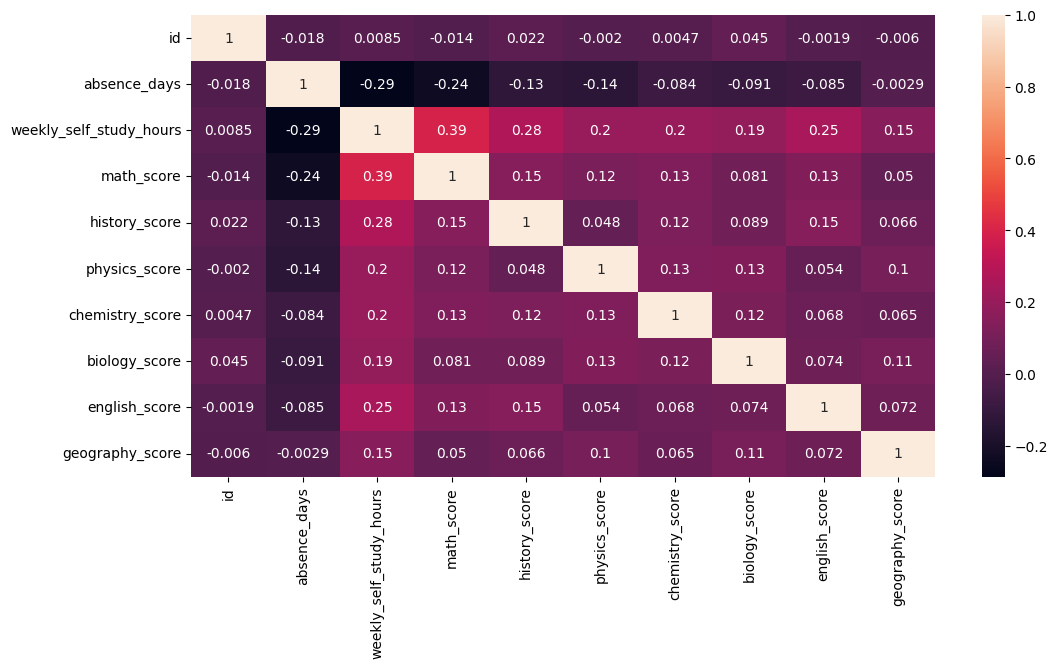

In [9]:
# Visualizing correlation
plt.figure(figsize = (12, 6))
sns.heatmap(corr_matrix.corr(), annot = True,)

- Weekly_self_study_hours and math_score has approximately 0.39% of correlation. - positive
- Compared to rest of the features.

<Axes: xlabel='weekly_self_study_hours', ylabel='math_score'>

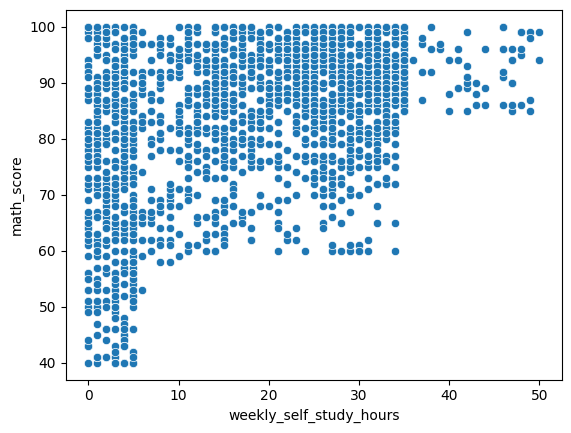

In [10]:
sns.scatterplot(x = 'weekly_self_study_hours', y = 'math_score', data = df)

- There is outliers and variablitiy in data
- Some students have high study hours

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'id'),
  Text(1, 0, 'part_time_job'),
  Text(2, 0, 'absence_days'),
  Text(3, 0, 'extracurricular_activities'),
  Text(4, 0, 'weekly_self_study_hours'),
  Text(5, 0, 'math_score'),
  Text(6, 0, 'history_score'),
  Text(7, 0, 'physics_score'),
  Text(8, 0, 'chemistry_score'),
  Text(9, 0, 'biology_score'),
  Text(10, 0, 'english_score'),
  Text(11, 0, 'geography_score')])

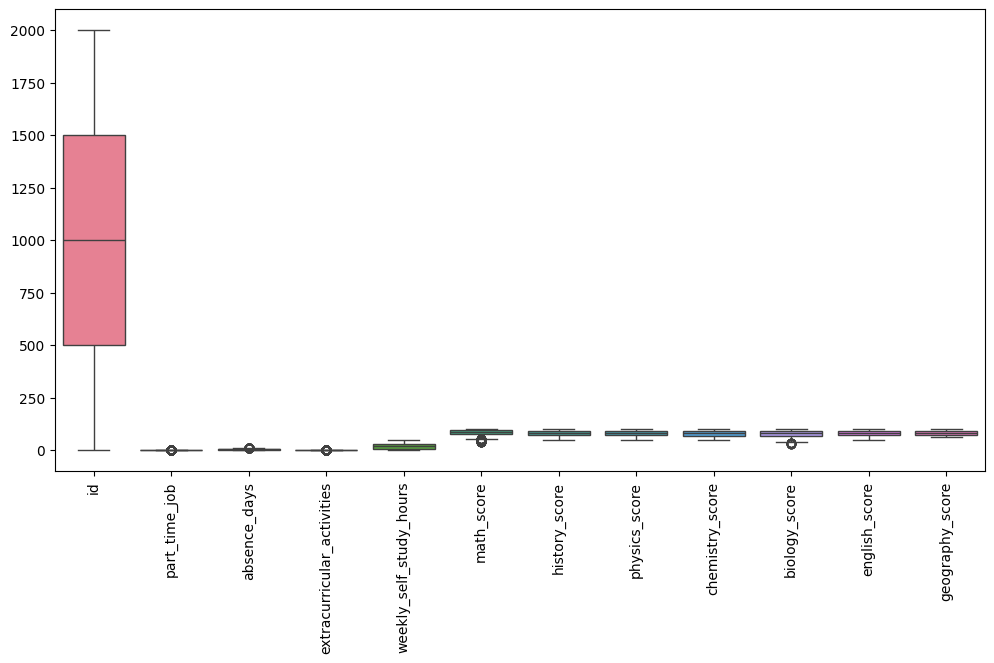

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(df)
plt.xticks(rotation = 90)

- Outliers in math_Score

In [12]:
Q1 = df['math_score'].quantile(0.25)
Q3 = df['math_score'].quantile(0.75)

# Step 2: Calculate IQR
IQR = Q3 - Q1

# Step 3: Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter the DataFrame to remove outliers
df_no_outliers = df[(df['math_score'] >= lower_bound) & (df['math_score'] <= upper_bound)]

# Display the shape of the DataFrame before and after removing outliers
print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing outliers: {df_no_outliers.shape}")

Original DataFrame shape: (2000, 17)
DataFrame shape after removing outliers: (1930, 17)


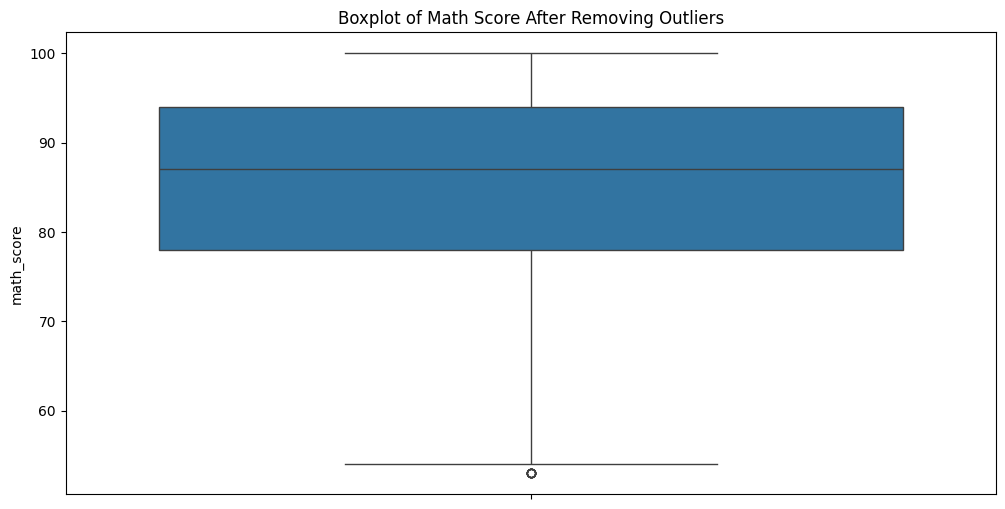

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(df_no_outliers['math_score'])
plt.title('Boxplot of Math Score After Removing Outliers')
plt.show()

# Dropping Columns

In [14]:
df_no_outliers.columns

Index(['id', 'first_name', 'last_name', 'email', 'gender', 'part_time_job',
       'absence_days', 'extracurricular_activities', 'weekly_self_study_hours',
       'career_aspiration', 'math_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score', 'english_score', 'geography_score'],
      dtype='object')

In [15]:
df_no_outliers.drop(columns=['id', 'first_name', 'last_name', 'email', 'gender', 'part_time_job','absence_days', 'extracurricular_activities', 
                 'career_aspiration', 'history_score', 'physics_score','chemistry_score', 'biology_score', 'english_score', 'geography_score']
        , inplace=True)

C:\Users\anoop\AppData\Local\Temp\ipykernel_2892\1122692683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop(columns=['id', 'first_name', 'last_name', 'email', 'gender', 'part_time_job','absence_days', 'extracurricular_activities',


In [16]:
df_no_outliers.head()

,weekly_self_study_hours,math_score
0,27,73
1,47,90
2,13,81
3,3,71
4,10,84


# Splitting data

In [26]:
# Independent and Dependent Features
X = df_no_outliers[['weekly_self_study_hours']]
y = df_no_outliers['math_score']

In [27]:
X

,weekly_self_study_hours
0,27
1,47
2,13
3,3
4,10
...,...
1994,19
1995,30
1996,20
1997,14


In [28]:
y

0       73
1       90
2       81
3       71
4       84
        ..
1994    76
1995    83
1996    89
1997    97
1999    82
Name: math_score, Length: 1930, dtype: int64

# Train Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1447, 1) (483, 1) (1447,) (483,)


# Scaling the features

In [30]:
scaler = StandardScaler()

In [31]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_sclaed = scaler.transform(X_test)

In [32]:
X_train_scaled

array([[-1.29272714],
       [ 0.45781206],
       [ 0.70788908],
       ...,
       [ 0.45781206],
       [ 0.62453008],
       [-1.37608615]])

In [33]:
X_test_sclaed

array([[-0.12570101],
       [-0.29241903],
       [-1.04265011],
       [ 0.45781206],
       [ 1.12468413],
       [-1.37608615],
       [-0.87593209],
       [ 0.12437602],
       [-1.04265011],
       [ 0.62453008],
       [-1.37608615],
       [ 1.12468413],
       [-0.20906002],
       [ 0.29109404],
       [-1.20936813],
       [-0.29241903],
       [ 0.54117107],
       [-1.04265011],
       [ 0.62453008],
       [-1.54280416],
       [-1.20936813],
       [-0.62585506],
       [-0.45913704],
       [-1.12600912],
       [ 0.45781206],
       [ 2.6251463 ],
       [-1.29272714],
       [ 0.37445305],
       [ 0.54117107],
       [-0.54249605],
       [-0.042342  ],
       [ 1.29140215],
       [ 1.29140215],
       [ 0.12437602],
       [ 0.29109404],
       [-1.37608615],
       [ 0.79124809],
       [ 0.20773503],
       [-0.62585506],
       [ 1.37476116],
       [ 1.20804314],
       [ 1.95827422],
       [-1.29272714],
       [-1.37608615],
       [-0.79257308],
       [-0

# Model Training

In [39]:
regression = LinearRegression()

In [41]:
regression.fit(X_train_scaled, y_train)

LinearRegression()

In [51]:
regression.coef_

array([3.60699635])

In [52]:
regression.intercept_

np.float64(84.64409122322046)

# Model Evaluation

In [43]:
y_pred = regression.predict(X_test_sclaed)
y_pred

array([84.19068815, 83.58933686, 80.88325609, 86.29541764, 88.70082277,
       79.68055352, 81.48460737, 85.09271507, 80.88325609, 86.89676892,
       79.68055352, 88.70082277, 83.89001251, 85.69406636, 80.28190481,
       83.58933686, 86.59609328, 80.88325609, 86.89676892, 79.07920224,
       80.28190481, 82.3866343 , 82.98798558, 80.58258045, 86.29541764,
       94.11298432, 79.98122917, 85.994742  , 86.59609328, 82.68730994,
       84.49136379, 89.30217405, 89.30217405, 85.09271507, 85.69406636,
       79.68055352, 87.49812021, 85.39339071, 82.3866343 , 89.6028497 ,
       89.00149841, 91.70757919, 79.98122917, 79.68055352, 81.78528302,
       84.19068815, 84.19068815, 83.28866122, 85.09271507, 79.98122917,
       87.79879585, 79.68055352, 82.08595866, 86.29541764, 87.19744456,
       85.09271507, 83.58933686, 79.07920224, 79.68055352, 88.40014713,
       79.98122917, 81.18393173, 89.30217405, 85.39339071, 88.09947149,
       89.6028497 , 85.39339071, 89.00149841, 83.28866122, 85.99

In [50]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
adjusted_Score = 1 -  (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] -1)

print(f'mean_squared_error: {mse}')
print(f'mean_absolute_error: {mae}')
print(f'r2_score: {score}')
print(f'adjusted_R2_Score: {adjusted_Score}')

mean_squared_error: 113.90196651590867
mean_absolute_error: 8.70962628908922
r2_score: 0.11071863225456291
adjusted_R2_Score: 0.10886981444220234


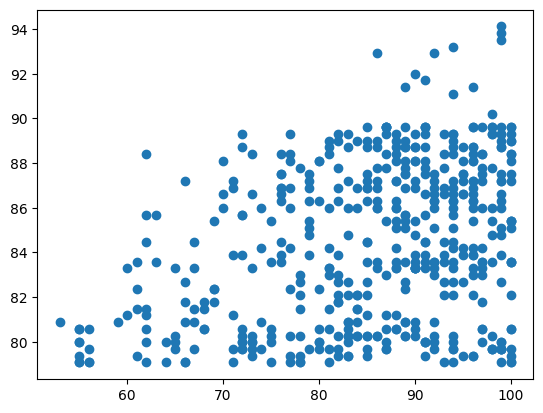

In [53]:
plt.scatter(y_test, y_pred)

- r2 and adjusted score is really low - state that model is not good

# Lasso model(L1) 

In [54]:
l1 = Lasso()

In [55]:
l1.fit(X_train_scaled, y_train)

Lasso()

In [57]:
y_pred_l1 = l1.predict(X_test_sclaed)

In [58]:
mse = mean_squared_error(y_test, y_pred_l1)
mae = mean_absolute_error(y_test, y_pred_l1)
score = r2_score(y_test, y_pred_l1)
adjusted_Score = 1 -  (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] -1)

print(f'mean_squared_error: {mse}')
print(f'mean_absolute_error: {mae}')
print(f'r2_score: {score}')
print(f'adjusted_R2_Score: {adjusted_Score}')

mean_squared_error: 115.37725387835934
mean_absolute_error: 8.772287346077253
r2_score: 0.09920043284477087
adjusted_R2_Score: 0.09732766867189102


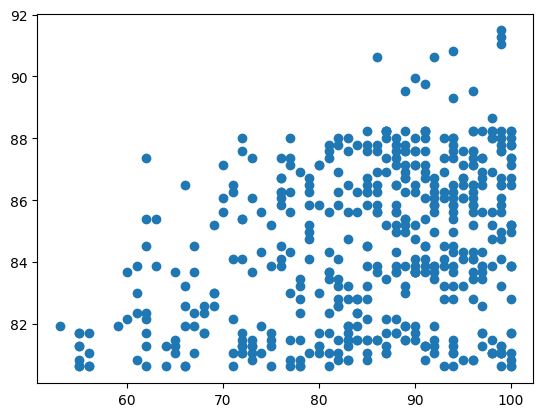

In [59]:
plt.scatter(y_test, y_pred_l1)

# Ridge (L2) Model

In [60]:
l2 = Ridge()

In [61]:
l2.fit(X_train_scaled, y_train)

Ridge()

In [62]:
y_pred_l2 = l2.predict(X_test_sclaed)

In [63]:
mse = mean_squared_error(y_test, y_pred_l2)
mae = mean_absolute_error(y_test, y_pred_l2)
score = r2_score(y_test, y_pred_l2)
adjusted_Score = 1 -  (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] -1)

print(f'mean_squared_error: {mse}')
print(f'mean_absolute_error: {mae}')
print(f'r2_score: {score}')
print(f'adjusted_R2_Score: {adjusted_Score}')

mean_squared_error: 113.90316790226879
mean_absolute_error: 8.70965694070021
r2_score: 0.11070925251742392
adjusted_R2_Score: 0.10886041520457024


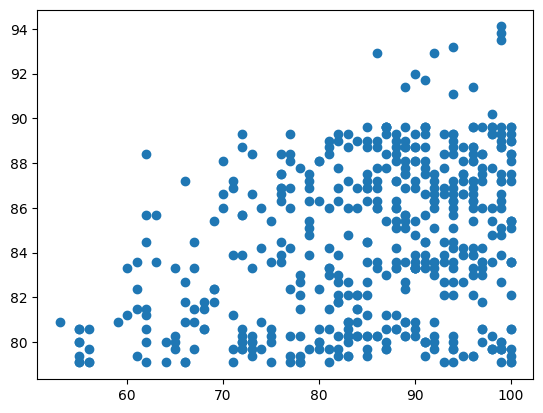

In [70]:
plt.scatter(y_test, y_pred_l2)

# ElasticNEt Model

In [66]:
l1_l2 = ElasticNet()

In [69]:
l1_l2.fit(X_train_scaled, y_train)

ElasticNet()

In [71]:
y_pred_l1_l2 = l1_l2.predict(X_test_sclaed)

In [72]:
mse = mean_squared_error(y_test, y_pred_l1_l2)
mae = mean_absolute_error(y_test, y_pred_l1_l2)
score = r2_score(y_test, y_pred_l1_l2)
adjusted_Score = 1 -  (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] -1)

print(f'mean_squared_error: {mse}')
print(f'mean_absolute_error: {mae}')
print(f'r2_score: {score}')
print(f'adjusted_R2_Score: {adjusted_Score}')

mean_squared_error: 116.98639920159337
mean_absolute_error: 8.837853074616186
r2_score: 0.08663714708493397
adjusted_R2_Score: 0.08473826381484029


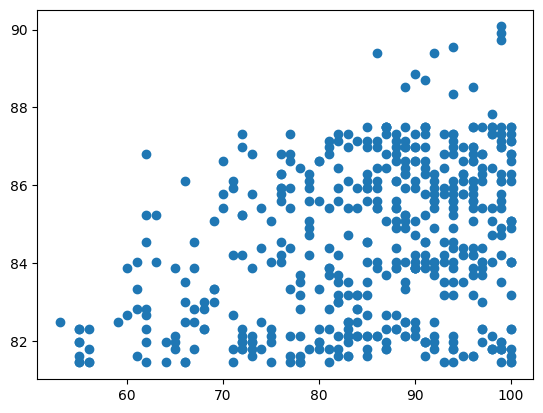

In [73]:
plt.scatter(y_test, y_pred_l1_l2)

# Hyper Parameter Tuning

## Using L1CV

mean_squared_error: 113.90371013048828
mean_absolute_error: 8.709673452286752
r2_score: 0.11070501910980679
adjusted_R2_Score: 0.10885617299569006


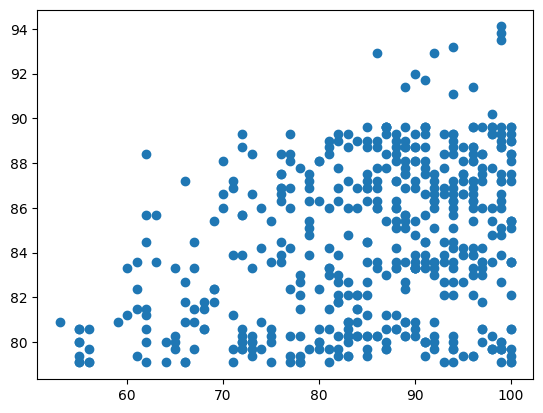

In [75]:
l1_cv = LassoCV()
l1_cv.fit(X_train_scaled, y_train)
y_pred_l1_cv = l1_cv.predict(X_test_sclaed)

mse = mean_squared_error(y_test, y_pred_l1_cv)
mae = mean_absolute_error(y_test, y_pred_l1_cv)
score = r2_score(y_test, y_pred_l1_cv)
adjusted_Score = 1 -  (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] -1)

print(f'mean_squared_error: {mse}')
print(f'mean_absolute_error: {mae}')
print(f'r2_score: {score}')
print(f'adjusted_R2_Score: {adjusted_Score}')

plt.scatter(y_test, y_pred_l1_cv)

# Using L2CV

mean_squared_error: 113.91445488464069
mean_absolute_error: 8.710095954616834
r2_score: 0.11062113021867515
adjusted_R2_Score: 0.10877210969937923


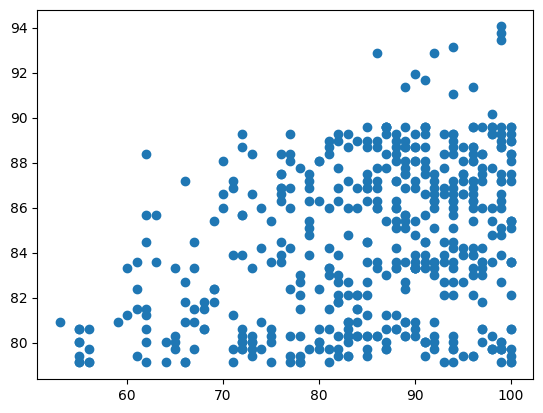

In [76]:
l2_cv = RidgeCV()
l2_cv.fit(X_train_scaled, y_train)
y_pred_l2_cv = l2_cv.predict(X_test_sclaed)

mse = mean_squared_error(y_test, y_pred_l2_cv)
mae = mean_absolute_error(y_test, y_pred_l2_cv)
score = r2_score(y_test, y_pred_l2_cv)
adjusted_Score = 1 -  (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] -1)

print(f'mean_squared_error: {mse}')
print(f'mean_absolute_error: {mae}')
print(f'r2_score: {score}')
print(f'adjusted_R2_Score: {adjusted_Score}')

plt.scatter(y_test, y_pred_l2_cv)

# USing ELASTICENETCV

mean_squared_error: 113.91018393618285
mean_absolute_error: 8.709886877701178
r2_score: 0.11065447533994333
adjusted_R2_Score: 0.10880552414522382


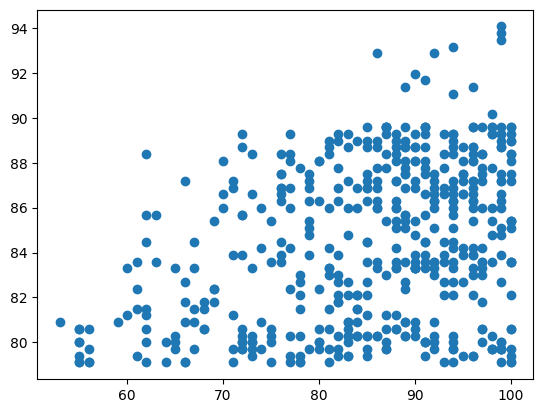

In [77]:
el_cv = ElasticNetCV()
el_cv.fit(X_train_scaled, y_train)
y_pred_el_cv = el_cv.predict(X_test_sclaed)

mse = mean_squared_error(y_test, y_pred_el_cv)
mae = mean_absolute_error(y_test, y_pred_el_cv)
score = r2_score(y_test, y_pred_el_cv)
adjusted_Score = 1 -  (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] -1)

print(f'mean_squared_error: {mse}')
print(f'mean_absolute_error: {mae}')
print(f'r2_score: {score}')
print(f'adjusted_R2_Score: {adjusted_Score}')

plt.scatter(y_test, y_pred_el_cv)

# OLS model

In [83]:
model = sm.OLS(y_train, X_train_scaled).fit()
prediction = model.predict(X_test)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             math_score   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              2.585
Date:                Wed, 11 Sep 2024   Prob (F-statistic):                       0.108
Time:                        10:46:17   Log-Likelihood:                         -8487.0
No. Observations:                1447   AIC:                                  1.698e+04
Df Residuals:                    1446   BIC:                                  1.698e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.6070      2.243      1.608      0.108      -0.794       8.008
==============================================================================
Omnibus:                       64.758   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.460
Skew:                          -0.492   Prob(JB):                     3.70e-15
Kurtosis:                       2.634   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""